## 1.读取数据

In [131]:
import pandas as pd
df = pd.read_csv('process_heart.csv')

## 2.提取特征变量和目标变量

In [132]:
X = df.drop(columns='target')
y = df['target']
features = X.head()

## 3.划分训练集和测试集

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('X_train行列: ', X_train.shape, '; X_test行列: ', X_test.shape)
display(X_train)
print('y_train行列: ', y_train.shape, '; y_test行列: ', y_test.shape)
display(y_test)

X_train行列:  (820, 26) ; X_test行列:  (205, 26)


,age,trestbps,chol,thalach,oldpeak,ca,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,...,restecg_normal,exang_no,exang_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,thal_unknown
151,54,192,283,195,0.0,1,0,1,0,1,...,1,1,0,1,0,0,0,0,1,0
485,62,120,281,103,1.4,1,0,1,0,1,...,1,1,0,0,1,0,0,0,1,0
794,61,134,234,145,2.6,2,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
699,35,126,282,156,0.0,0,0,1,0,0,...,1,0,1,1,0,0,0,0,1,0
546,70,130,322,109,2.4,3,0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,67,120,229,129,2.6,2,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
214,45,128,308,170,0.0,0,0,1,0,1,...,1,1,0,1,0,0,1,0,0,0
569,42,120,240,194,0.8,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
123,65,140,417,157,0.8,1,1,0,0,0,...,1,1,0,1,0,0,1,0,0,0


y_train行列:  (820,) ; y_test行列:  (205,)


85     1
210    1
182    0
872    1
716    0
      ..
100    1
203    1
881    0
682    0
992    1
Name: target, Length: 205, dtype: int64

## 4.模型训练和搭建

In [134]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(learning_rate=0.25, n_estimators=80, num_leaves=31)
model.fit(X_train, y_train)
#使用传统lightgbm模型
# import lightgbm as lgb
# import dtreeviz as dtree
# lgbm_params = {
#     'boosting': 'dart',          # dart (drop out trees) often performs better
#     'application': 'binary',     # Binary classification
#     'learning_rate': 0.05,       # Learning rate, controls size of a gradient descent step
#     'min_data_in_leaf': 2,      # Data set is quite small so reduce this a bit
#     'feature_pre_filter': False,
#     'feature_fraction': 0.7,     # Proportion of features in each boost, controls overfitting
#     'num_leaves': 41,            # Controls size of tree since LGBM uses leaf wise splits
#     'drop_rate': 0.15,
#     'max_depth':4,
#     "seed":1212}
#
# train_data = lgb.Dataset(data=X_train, label=y_train, feature_name=features)
# valid_data = lgb.Dataset(data=X_test, label=y_test, feature_name=features)
#
# lgbm_model = lgb.train(lgbm_params, train_data, valid_sets=[train_data, valid_data], 
# verbose_eval=False)

LGBMClassifier(learning_rate=0.25, n_estimators=80)

In [135]:
#未进行参数优化的模型
model_unoptimized = LGBMClassifier()
model_unoptimized.fit(X_train, y_train)

LGBMClassifier()

## 5.模型预测及评估

In [136]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
#与未优化的模型进行对比
y_pred_unoptimized = model_unoptimized.predict(X_test)
y_pred_proba_unoptimized = model_unoptimized.predict_proba(X_test)

prob_table = pd.DataFrame() #创建预测概率表格
prob_table['实际值'] = list(y_test)
prob_table['优化后预测值'] = list(y_pred)
prob_table['未优化预测值'] = list(y_pred_unoptimized)
prob_table['优化后概率(0, 1)'] = list(y_pred_proba)
prob_table['未优化概率(0, 1)'] = list(y_pred_proba_unoptimized)
display(prob_table)

,实际值,优化后预测值,未优化预测值,"优化后概率(0, 1)","未优化概率(0, 1)"
0,1,1,1,"[1.131913307528265e-08, 0.9999999886808669]","[5.384129225216583e-05, 0.9999461587077478]"
1,1,1,1,"[6.675171987391426e-05, 0.9999332482801261]","[0.005374185385389252, 0.9946258146146107]"
2,0,0,0,"[0.9999999833639713, 1.6636028709625367e-08]","[0.9999565346184837, 4.3465381516372054e-05]"
3,1,1,1,"[0.00022740086307626584, 0.9997725991369237]","[0.03812396531509232, 0.9618760346849077]"
4,0,0,0,"[0.9999987392219152, 1.2607780847953167e-06]","[0.9994478690216627, 0.0005521309783372446]"
...,...,...,...,...,...
200,1,1,1,"[3.9774123183899945e-07, 0.9999996022587682]","[0.0002225358078400408, 0.99977746419216]"
201,1,1,1,"[0.00022740086307626584, 0.9997725991369237]","[0.03812396531509232, 0.9618760346849077]"
202,0,0,0,"[0.9999408865718388, 5.911342816127465e-05]","[0.9934088820706101, 0.006591117929389951]"
203,0,0,0,"[0.9999988529986813, 1.1470013186500566e-06]","[0.9998445266637921, 0.00015547333620796015]"


#### 5.1 准确率，召回率，AUC值，混淆矩阵
accuracy_score 分类准确率分数是指所有分类正确的百分比。分类准确率这一衡量分类器的标准比较容易理解，但是它不能告诉你响应值的潜在分布，并且它也不能告诉你分类器犯错的类型。
sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
normalize：默认值为True，返回正确分类的比例；如果为False，返回正确分类的样本数

In [137]:
from sklearn.metrics import accuracy_score
accu_score = accuracy_score(y_pred, y_test)
model.score(X_test, y_test)
print('分类准确率:', accu_score)

分类准确率: 1.0


recall_score 召回率=提取出的正确信息条数/样本中的信息条数。通俗地说，就是所有准确的条目有多少被检索出来了。
sklearn.metrics.recall_score(y_true, y_pred, labels=None, pos_label=1,average='binary', sample_weight=None)
参数average : string, [None, ‘micro’, ‘macro’(default), ‘samples’, ‘weighted’]
将一个二分类matrics拓展到多分类或多标签问题时，我们可以将数据看成多个二分类问题的集合，每个类都是一个二分类。接着，我们可以通过跨多个分类计算每个二分类metrics得分的均值，这在一些情况下很有用。你可以使用average参数来指定。
macro：计算二分类metrics的均值，为每个类给出相同权重的分值。当小类很重要时会出问题，因为该macro-averging方法是对性能的平均。另一方面，该方法假设所有分类都是一样重要的，因此macro-averaging方法会对小类的性能影响很大。
weighted:对于不均衡数量的类来说，计算二分类metrics的平均，通过在每个类的score上进行加权实现。
micro：给出了每个样本类以及它对整个metrics的贡献的pair（sample-weight），而非对整个类的metrics求和，它会每个类的metrics上的权重及因子进行求和，来计算整个份额。Micro-averaging方法在多标签（multilabel）问题中设置，包含多分类，此时，大类将被忽略。
samples：应用在multilabel问题上。它不会计算每个类，相反，它会在评估数据中，通过计算真实类和预测类的差异的metrics，来求平均（sample_weight-weighted）
average：average=None将返回一个数组，它包含了每个类的得分.

In [138]:
from sklearn.metrics import recall_score
rec_score = recall_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
print('召回率:', rec_score)

召回率: 1.0


求出模型AUC值
计算AUC值，其中x,y分别为数组形式，根据(xi,yi)在坐标上的点，生成的曲线，然后计算AUC值；
形式：sklearn.metrics.auc(x, y, reorder=False)
roc_auc_score
直接根据真实值（必须是二值）、预测值（可以是0/1,也可以是proba值）计算出auc值，中间过程的roc计算省略。
形式：sklearn.metrics.roc_auc_score(y_true, y_score, average='macro', average: string, [None, ‘micro’, ‘macro’(default), ‘samples’, ‘weighted’])

混淆矩阵
形式：sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None) 返回一个混淆矩阵；
labels：混淆矩阵的索引，如果没有赋值，则按照y_true, y_pred中出现过的值排序。

AUC值:  1.0


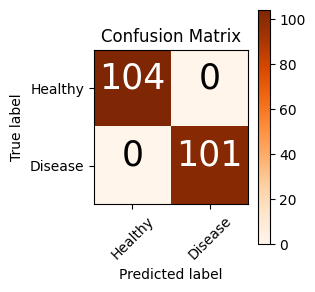

In [139]:
from sklearn.metrics import roc_auc_score
AUCscore = roc_auc_score(y_test.values, y_pred_proba[:, 1])
print('AUC值: ', AUCscore)

import numpy as np
import itertools
import matplotlib.pyplot as plt

def cnf_matrix_plotter(cm, classes):
    plt.figure(figsize=(3, 3))
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    threshold=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>threshold else "black",
                 fontsize=25)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

from sklearn.metrics import confusion_matrix
confusion_matrix_model = confusion_matrix(y_pred, y_test)
cnf_matrix_plotter(confusion_matrix_model, ['Healthy','Disease'])

#### 5.2 ROC曲线，特征重要性

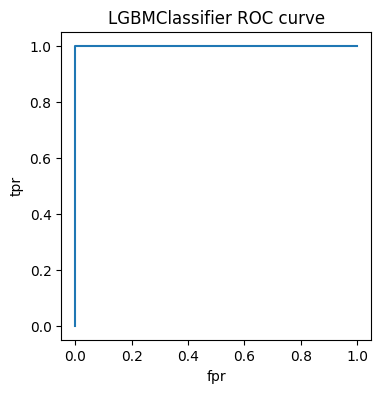

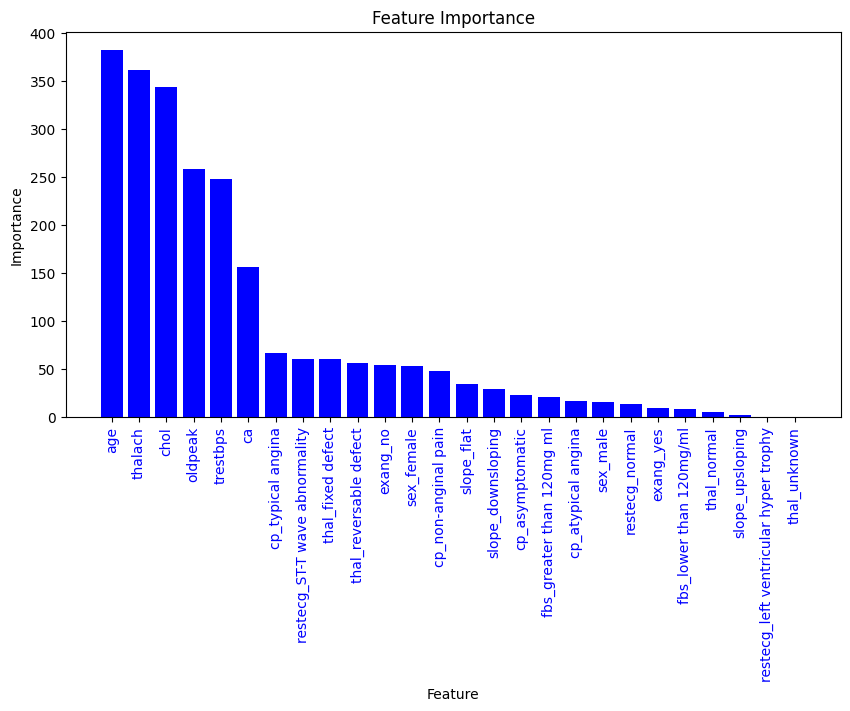

In [140]:
# 绘制ROC曲线评估模型预测效果
# ROC曲线指受试者工作特征曲线/接收器操作特性(receiveroperating characteristic，ROC)曲线,
# 是反映灵敏性和特效性连续变量的综合指标,
# 是用构图法揭示敏感性和特异性的相互关系，它通过将连续变量设定出多个不同的临界值，
# 从而计算出一系列敏感性和特异性。
# ROC曲线是根据一系列不同的二分类方式（分界值或决定阈），
# 以真正例率（也就是灵敏度）（True Positive Rate,TPR）为纵坐标，
# 假正例率（1-特效性）（False Positive Rate,FPR）为横坐标绘制的曲线。

# ROC观察模型正确地识别正例的比例与模型错误地把负例数据识别成正例的比例之间的权衡。
# TPR的增加以FPR的增加为代价。
# ROC曲线下的面积是模型准确率的度量，AUC（Area under roccurve）。

# 纵坐标：真正率（True Positive Rate , TPR）或灵敏度（sensitivity）
# TPR = TP /（TP + FN）（正样本预测结果数 / 正样本实际数）
# 横坐标：假正率（False Positive Rate , FPR）
# FPR = FP /（FP + TN） （被预测为正的负样本结果数 /负样本实际数）
# 形式：sklearn.metrics.roc_curve(y_true,y_score,
# pos_label=None,sample_weight=None, drop_intermediate=True)
# 
# 该函数返回这三个变量：fpr,tpr,和阈值thresholds;
# 这里理解thresholds:
# 分类器的一个重要功能“概率输出”，
# 即表示分类器认为某个样本具有多大的概率属于正样本（或负样本）。
# “Score”表示每个测试样本属于正样本的概率。

# 接下来，我们从高到低，依次将“Score”值作为阈值threshold，
# 当测试样本属于正样本的概率大于或等于这个threshold时，
# 我们认为它为正样本，否则为负样本。每次选取一个不同的threshold，
# 我们就可以得到一组FPR和TPR，即ROC曲线上的一点。
# 当我们将threshold设置为1和0时，分别可以得到ROC曲线上的(0,0)和(1,1)两个点。
# 将这些(FPR,TPR)对连接起来，就得到了ROC曲线。
# 当threshold取值越多，ROC曲线越平滑。其实，
# 我们并不一定要得到每个测试样本是正样本的概率值，
# 只要得到这个分类器对该测试样本的“评分值”即可（评分值并不一定在(0,1)区间）。
# 评分越高，表示分类器越肯定地认为这个测试样本是正样本，
# 而且同时使用各个评分值作为threshold。我认为将评分值转化为概率更易于理解一些。

# ROC曲线的横坐标是假阳性率(FalsePositiveRate),纵坐标是真阳性率(TruePositiveRate),
# 相应的还有真阴性率(TrueNegativeRate)和假阴性率(FalseNegativeRate)。

from sklearn.metrics import  roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:, 1])
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr)
plt.title('LGBMClassifier ROC curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

#整理特征重要性
import operator
features = X.columns
importance = model.feature_importances_

importance_df = pd.DataFrame()
importance_df['特征名称'] = features
importance_df['特征重要性'] = importance
importance_df = importance_df.sort_values(by=['特征重要性'], ascending=False)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.bar(range(len(importance)),importance_df['特征重要性'],color='b')
plt.xticks(range(len(importance)),importance_df['特征名称'],color='b',rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

## 6.参数调优

In [141]:
# 使用GridSearchCV()网格搜索交叉验证的方法对上方LightGBM模型进行参数调优，由于这个参数比较多,
# 所以这里挑选几个来调优

# num_leaves:决策树的最大叶子节点数,即决策树最多有多少个叶子节点,默认取值为31,
# 因为LightGBM模型使用的是leaf_wise生长策略,所以在调节树的复杂度的时候常用的参数是num_leaves,
# 而不是树的最大深度参数max_depth

# n_estimators:弱学习器的每个数,或者说是弱学习器的最大迭代次数,默认取100

# learning_rate:学习率,又称为每个弱学习器的权重缩减系数,取值范围为(0,1],默认取值为0.1。
# 取值较小意味着要达到一定的误分类数或学习效果,需要更多的迭代次数和更多的弱学习器。

from sklearn.model_selection import GridSearchCV
parameters = {'num_leaves': [10, 15, 31, 60], 'n_estimators':[10, 20, 30, 50, 80, 100], 'learning_rate':[0.05, 0.1, 0.2]}
model = LGBMClassifier()
grid_search = GridSearchCV(model, parameters, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_
#参数优化后准确率进一步提升

{'learning_rate': 0.2, 'n_estimators': 80, 'num_leaves': 31}

## 7.SHAP值分析

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


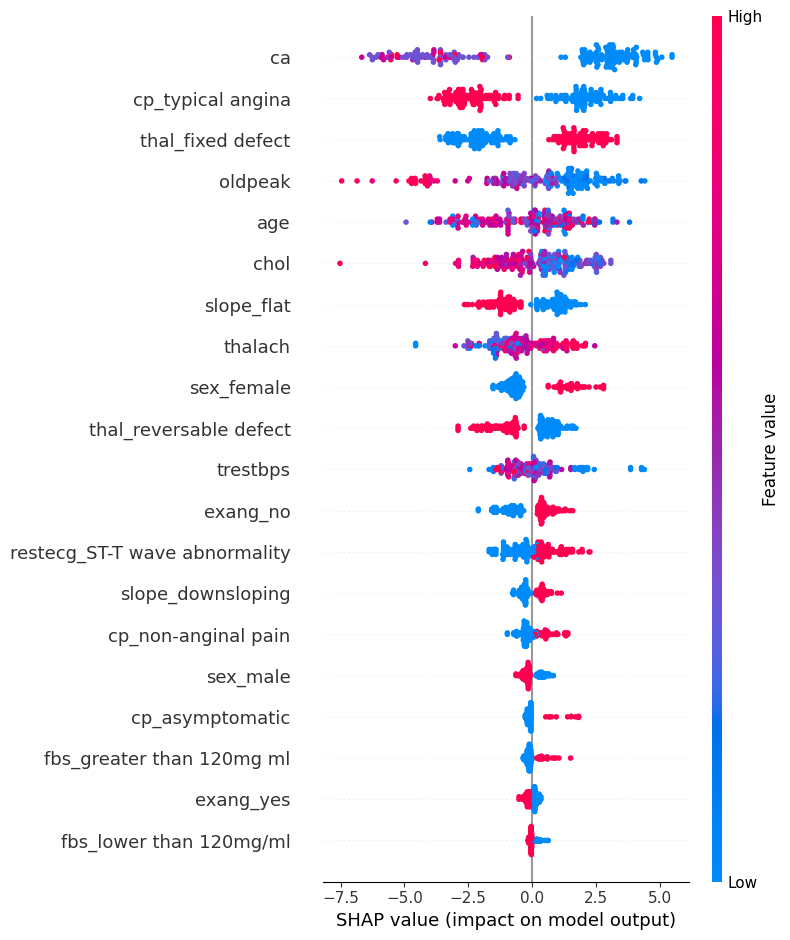

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


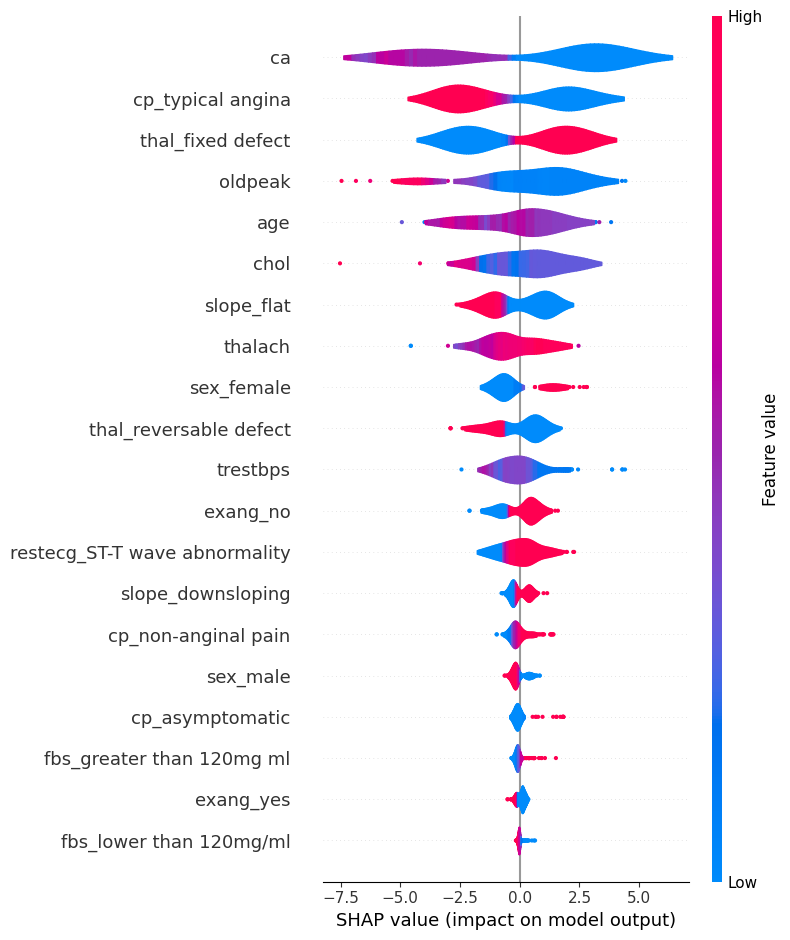

In the future `np.bool` will be defined as the corresponding NumPy scalar.


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [142]:
import shap
model = LGBMClassifier(learning_rate=0.25, n_estimators=80, num_leaves=31)
model.fit(X_train, y_train)
shap.initjs()
explainer=shap.TreeExplainer(model)

shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test)
shap.summary_plot(shap_values[1],X_test,plot_type="violin")
shap_interaction_values=explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values[1],X_test)